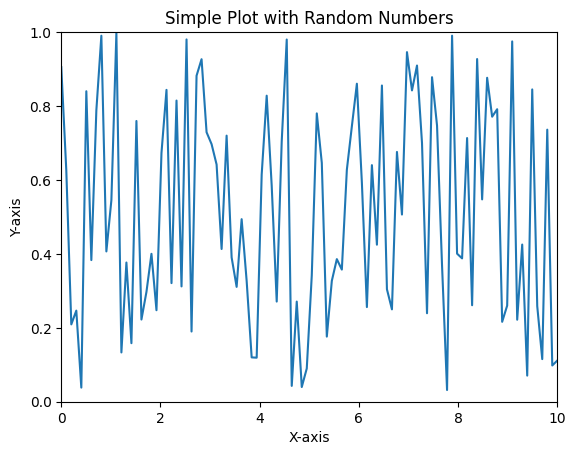

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a simple plot with random numbers
x = np.linspace(0, 10, 100)
y = np.random.rand(100)

plt.figure()
plt.plot(x, y)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.title("Simple Plot with Random Numbers")
plt.show()



In [22]:
# Load Toyota dataset for subsequent steps (assuming the dataset is in the same directory)
toyota_df = pd.read_csv("ToyotaCorolla.csv")

toyota_df.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


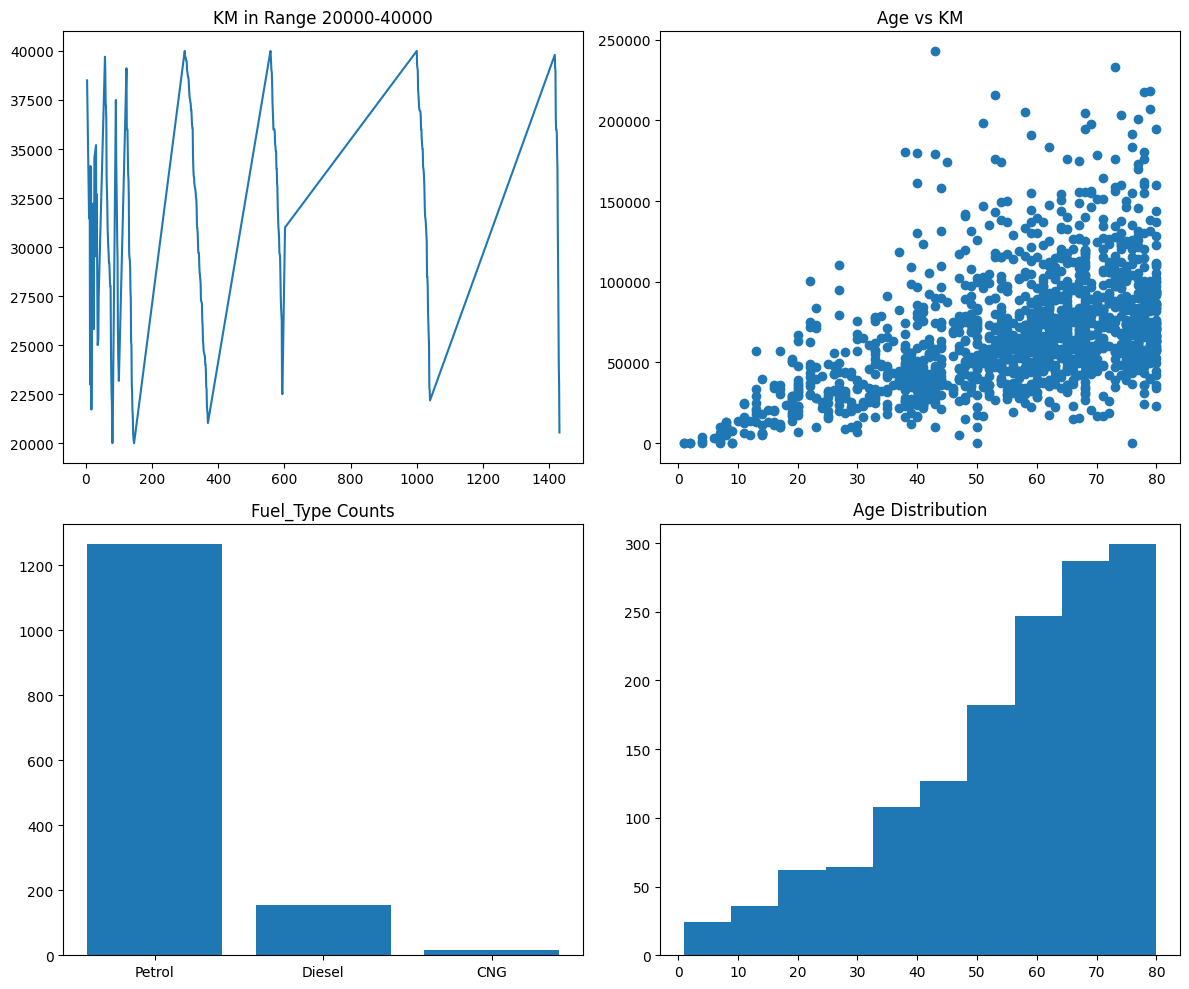

In [6]:
# 3. Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 3.1 Plot for KM range 20000 to 40000
km_range = toyota_df[(toyota_df['KM'] >= 20000) & (toyota_df['KM'] <= 40000)]
axes[0, 0].plot(km_range['KM'])
axes[0, 0].set_title("KM in Range 20000-40000")

# 3.2 Relationship between Age and KM
axes[0, 1].scatter(toyota_df['Age_08_04'], toyota_df['KM'])
axes[0, 1].set_title("Age vs KM")

# 3.3 Quantity based on FuelType
fuel_type_counts = toyota_df['Fuel_Type'].value_counts()
axes[1, 0].bar(fuel_type_counts.index, fuel_type_counts.values)
axes[1, 0].set_title("Fuel_Type Counts")

# 3.4 Summary of Age attribute
axes[1, 1].hist(toyota_df['Age_08_04'], bins=10)
axes[1, 1].set_title("Age Distribution")
plt.tight_layout()
plt.show()


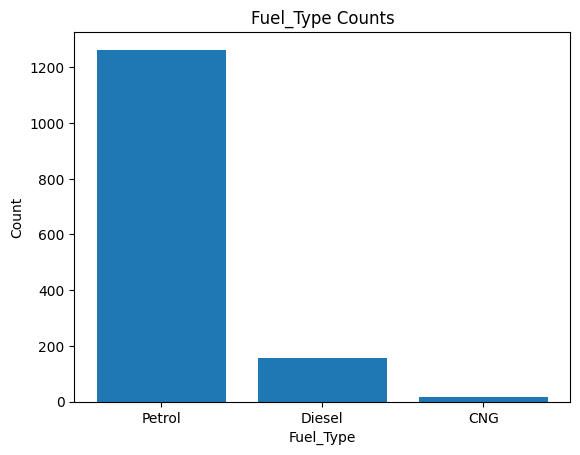

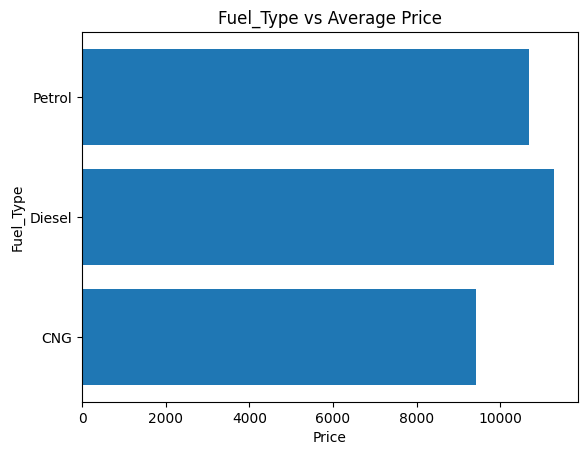

In [7]:

# 4. Bar chart for FuelType and its count
plt.figure()
plt.bar(fuel_type_counts.index, fuel_type_counts.values)
plt.xlabel("Fuel_Type")
plt.ylabel("Count")
plt.title("Fuel_Type Counts")
plt.show()

# 5. Horizontal bar chart for FuelType and Price
fuel_price = toyota_df.groupby("Fuel_Type")["Price"].mean()
plt.figure()
plt.barh(fuel_price.index, fuel_price.values)
plt.xlabel("Price")
plt.ylabel("Fuel_Type")
plt.title("Fuel_Type vs Average Price")
plt.show()



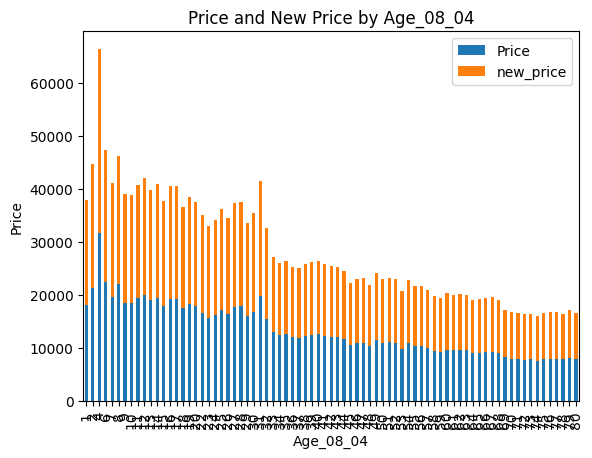

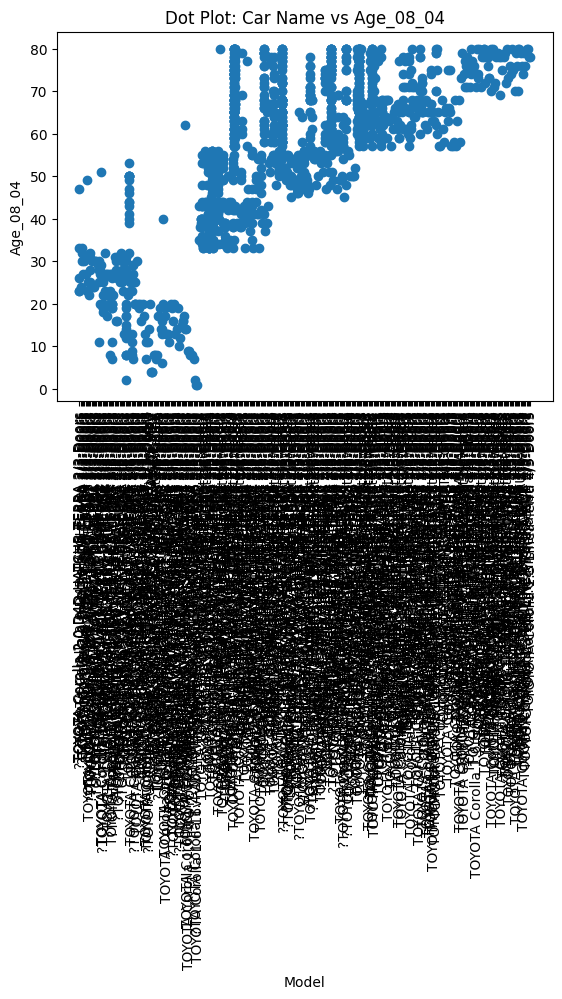

In [24]:

# 6. Compute new_price and draw stacked bar chart
toyota_df['new_price'] = toyota_df['Price'] * 1.1  # Assuming new_price is 10% increase of Price
price_data = toyota_df.groupby("Age_08_04")[['Price', 'new_price']].mean()
price_data.plot(kind="bar", stacked=True)
plt.xlabel("Age_08_04")
plt.ylabel("Price")
plt.title("Price and New Price by Age_08_04")
plt.show()

# 7. Dot plot between car name and age
plt.figure()
plt.scatter(toyota_df['Model'], toyota_df['Age_08_04'], marker='o')
plt.xlabel("Model")
plt.ylabel("Age_08_04")
plt.title("Dot Plot: Car Name vs Age_08_04")
plt.xticks(rotation=90)
plt.show()



Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64


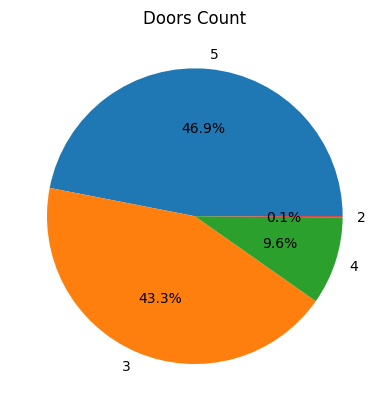

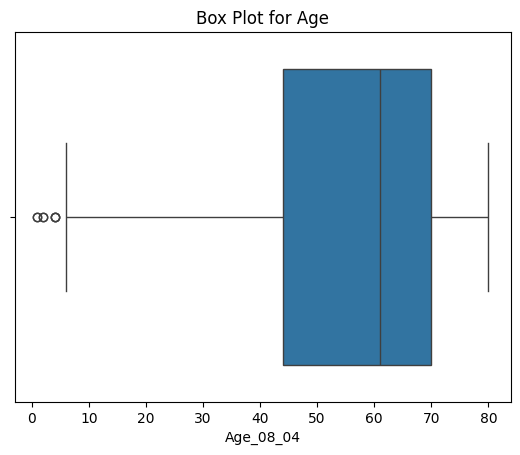

In [27]:
# 8. Pie chart for Doors and its count
door_counts = toyota_df['Doors'].value_counts()
print(door_counts)
plt.figure()
plt.pie(door_counts, labels=door_counts.index, autopct='%1.1f%%')
plt.title("Doors Count")
plt.show()

# 9. Box plot for Age
plt.figure()
sns.boxplot(x=toyota_df['Age_08_04'])
plt.title("Box Plot for Age")
plt.show()



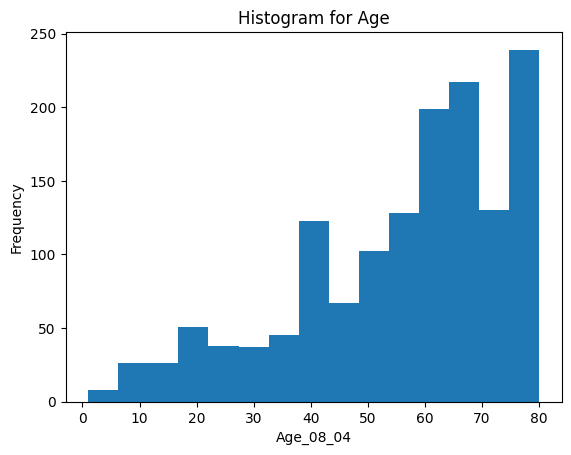

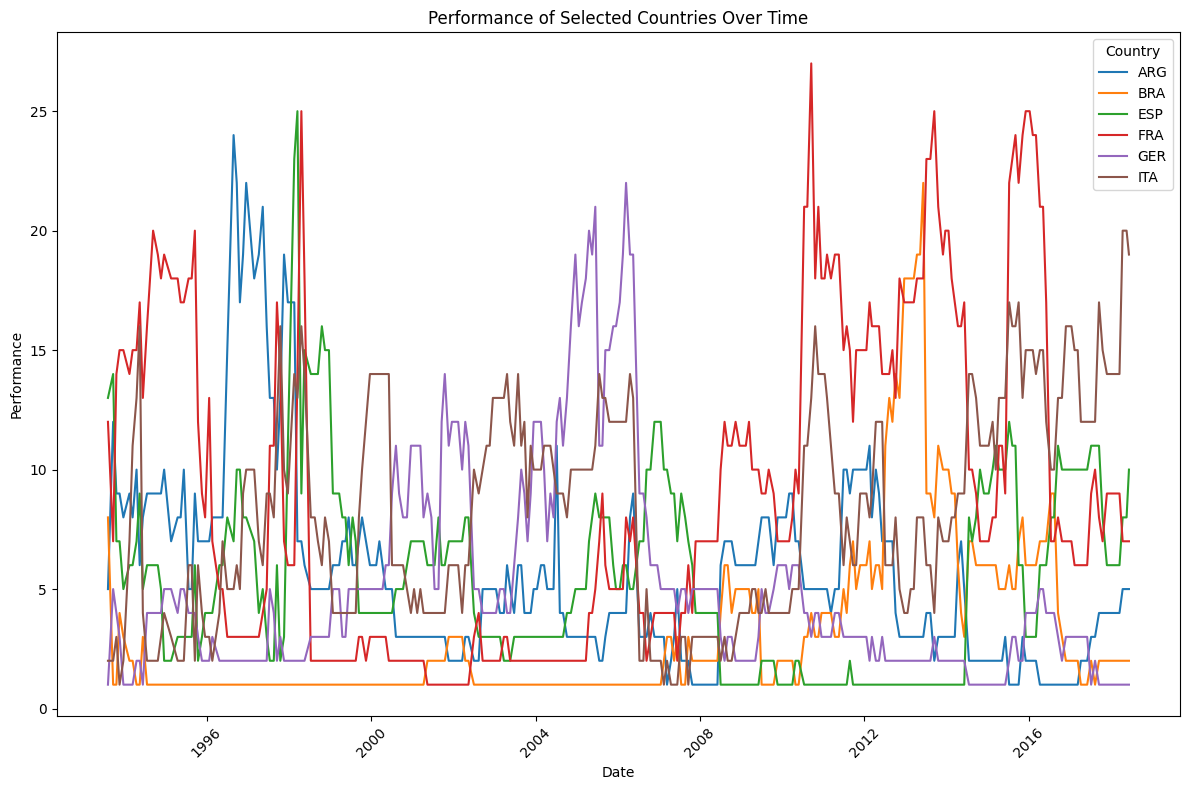

In [13]:
# 10. Histogram for Age
plt.figure()
plt.hist(toyota_df['Age_08_04'], bins=15)
plt.xlabel("Age_08_04")
plt.ylabel("Frequency")
plt.title("Histogram for Age")
plt.show()

# Load the FIFA dataset (using the example provided)
fifa_df = pd.read_csv("fifa.csv", parse_dates=["Date"])

# Plotting performance for each country over time
plt.figure(figsize=(12, 8))
for country in fifa_df.columns[1:]:  # Excluding the Date column
    plt.plot(fifa_df['Date'], fifa_df[country], label=country)

# Adding plot details
plt.xlabel("Date")
plt.ylabel("Performance")
plt.title("Performance of Selected Countries Over Time")
plt.legend(title="Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



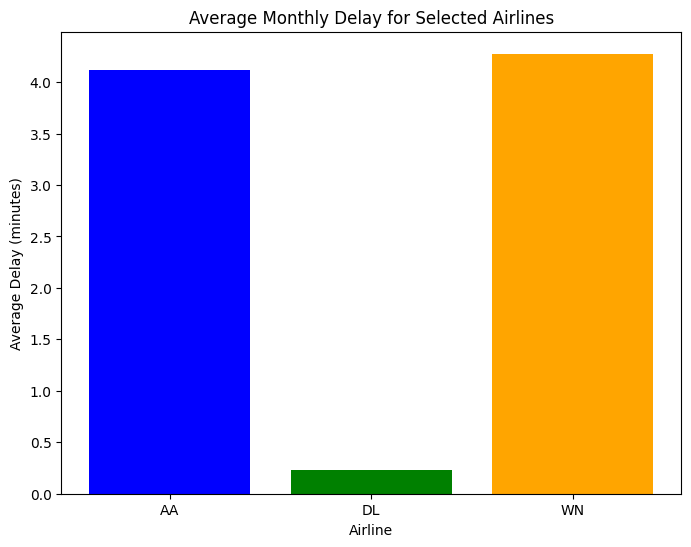

In [17]:
# Load the flight delays dataset (using the example provided)
flightdelays_df = pd.read_csv("flight_delays.csv")

# Selecting three airlines (e.g., AA, DL, WN) and plotting their average delay across months
selected_airlines = ['AA', 'DL', 'WN']
monthly_avg_delays = flightdelays_df[selected_airlines].mean()

# Creating a bar plot for average delays of selected airlines
plt.figure(figsize=(8, 6))
plt.bar(monthly_avg_delays.index, monthly_avg_delays.values, color=['blue', 'green', 'orange'])
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.title("Average Monthly Delay for Selected Airlines")
plt.show()


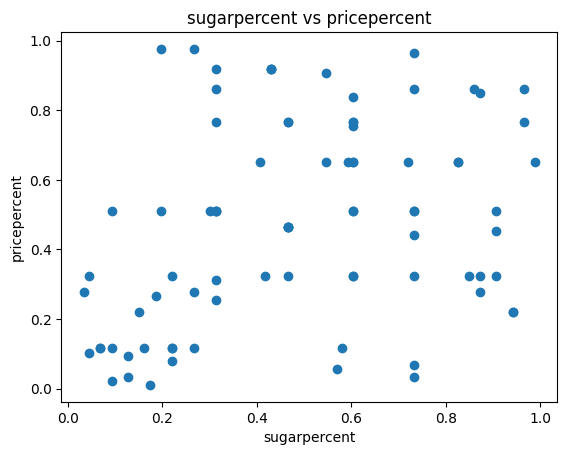

In [19]:
# Load Candy dataset
candy_df = pd.read_csv("candy.csv")

# 13. Scatter plot between Sugarpercent and Pricepercent
plt.figure()
plt.scatter(candy_df['sugarpercent'], candy_df['pricepercent'])
plt.xlabel("sugarpercent")
plt.ylabel("pricepercent")
plt.title("sugarpercent vs pricepercent")
plt.show()



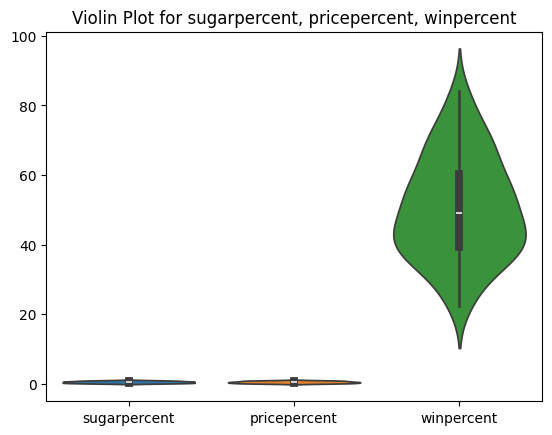

c:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 69.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\prath\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


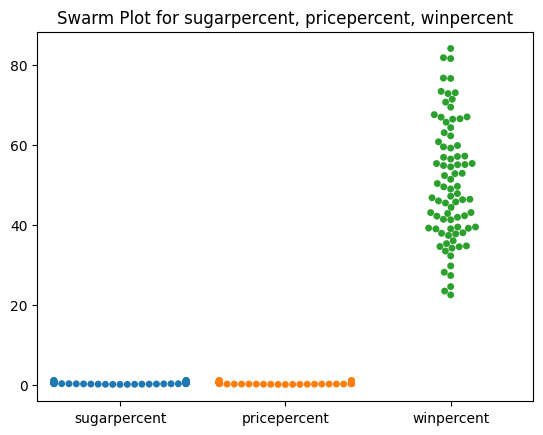

In [20]:
# 14. Violin and Swarm plots for features in Candy dataset
plt.figure()
sns.violinplot(data=candy_df[['sugarpercent', 'pricepercent', 'winpercent']])
plt.title("Violin Plot for sugarpercent, pricepercent, winpercent")
plt.show()

plt.figure()
sns.swarmplot(data=candy_df[['sugarpercent', 'pricepercent', 'winpercent']])
plt.title("Swarm Plot for sugarpercent, pricepercent, winpercent")
plt.show()